In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go   #advanced interactive plots.
import plotly.express as px   #advanced interactive plots.
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [53]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [57]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA

### 1. Pie Chart

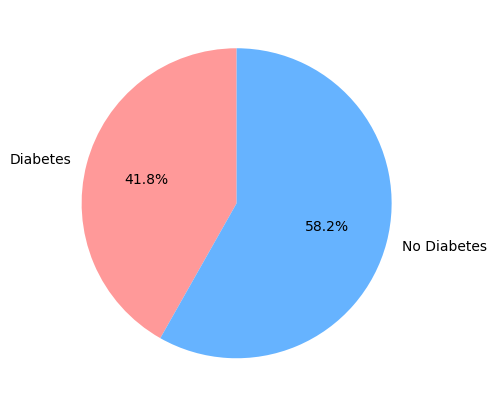

In [89]:
labels = ['Diabetes', 'No Diabetes']

# Filter data
diab_yes = df[df['diabetes'] == 1]
diab_no  = df[df['diabetes'] == 0]

size = [len(diab_yes), len(diab_no)]

colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5,6))
plt.pie(size, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90);
plt.show()

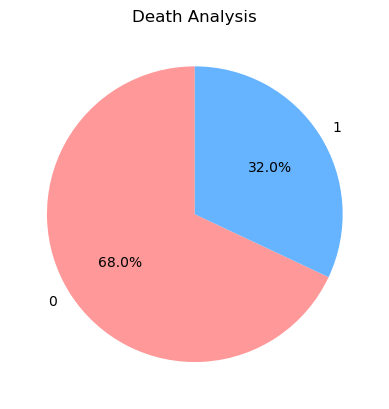

In [91]:
# Group by DEATH_EVENT and sum diabetes values
data = df.groupby('DEATH_EVENT')['diabetes'].sum()

# Labels (categories)
labels = data.index.astype(str)   # convert 0/1 to string for labels

colors = ['#ff9999','#66b3ff']
# Plot pie
plt.pie(data.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Death Analysis")
plt.show()


### 2.Heatmap


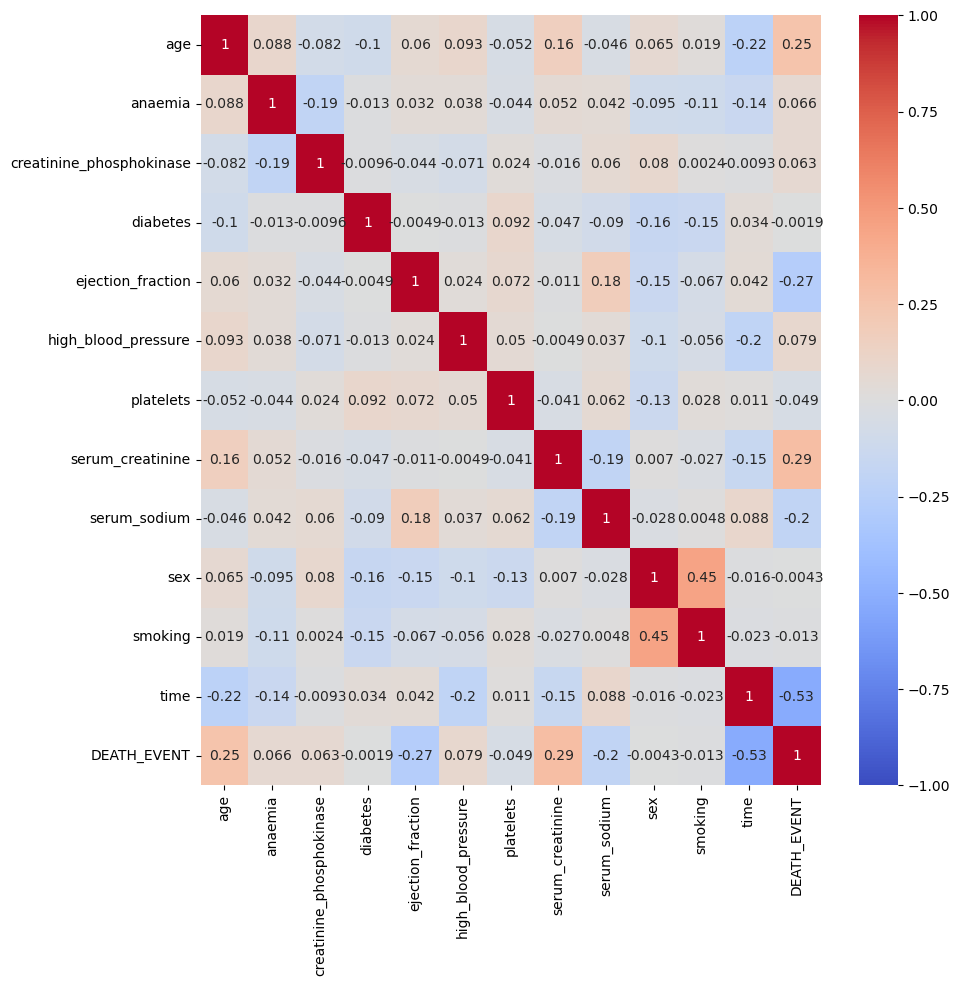

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

# Data Modeling

In [168]:
from sklearn.model_selection import train_test_split   #split dataset into train & test
from sklearn.metrics import confusion_matrix,accuracy_score   #model evaluation

In [170]:
features = ['time', 'ejection_fraction', 'serum_creatinine']
x = df[features]  #input variable
y = df['DEATH_EVENT']  #target, whether patient death or not

In [172]:
#split dataset for testing and training
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=2)

In [128]:
#This is Classification Type so use logReg
from sklearn.linear_model import LogisticRegression 

In [130]:
log_reg=LogisticRegression()

In [134]:
log_reg.fit(xtrain, ytrain)
prediction = log_reg.predict(xtest)

In [136]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [138]:
accuracy = accuracy_score(ytest, prediction)

In [140]:
accuracy

0.8666666666666667

In [142]:
print("Accuracy Score: ", "{:.2f}%".format(100*accuracy))

Accuracy Score:  86.67%


In [160]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

<Figure size 640x480 with 0 Axes>

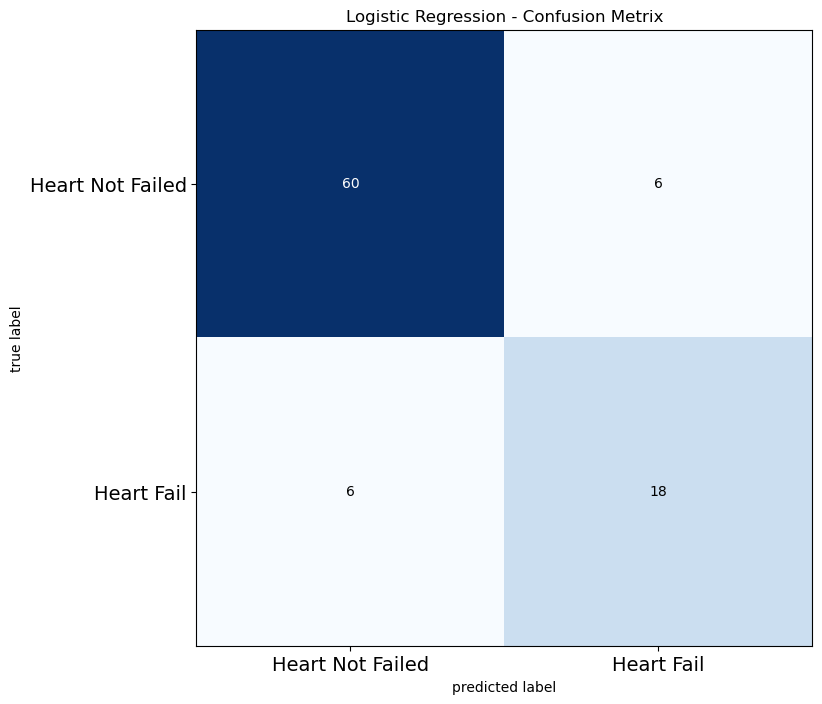

In [166]:
cm = confusion_matrix(ytest, prediction)
plt.figure()
plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Metrix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=14)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize=14)
plt.show()

## Testing


In [193]:
def predict_heart_failure(time, ejection_fraction, serum_creatinine):
    patient = [[time, ejection_fraction, serum_creatinine]]
    pred = log_reg.predict(patient)[0]
    prob = log_reg.predict_proba(patient)[0][1]

    if pred == 1:
        return f" Prediction: Heart Failure Risk (Probability: {prob:.2f})"
    else:
        return f"✅ Prediction: Not at Risk (Probability: {1-prob:.2f})"

In [201]:
akas = predict_heart_failure(120,25,2.7)
jafa = predict_heart_failure(270,60,0.8)
print(akas)

 Prediction: Heart Failure Risk (Probability: 0.74)
